# Tensorflow ImageDataGenerator를 이용한 Augmentation

## Load Image

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.datasets import mnist

%matplotlib inline

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train[:, ..., tf.newaxis]
x_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28, 1)

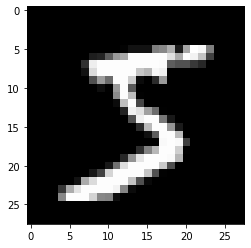

In [4]:
image = x_train[0, ..., 0]

plt.imshow(image, 'gray')
plt.show()

# Augmentation 이란?

이미지를 훈련 시키려고 하는데, 수집한 이미지나 가지고 있는 이미지가 조금 부족한 경우가 있을 수 있다.
* 각 이미지에 약간의 **변형을 추가**( Augmentation 을 줬다고 한다.)
* 제한된 이미지에서 여려가지 효과를 줄 수 있도록 하는 것
* 좌우반전, shift, zoom in / zoom out, rotation 등의 효과를 ImageDataGenerator를 이용해 줄 수 있다.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
# Augmentation 설정
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    horizontal_flip=True
)

Augmentation을 주기 위해서는 데이터의 형식을 CNN 레이어에 들어가는 형식으로 맞춰줘야 한다.

In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
inputs = x_train[0]
inputs = inputs[tf.newaxis, ...]
inputs.shape

(1, 28, 28, 1)

In [9]:
image = next(iter(datagen.flow(inputs)))

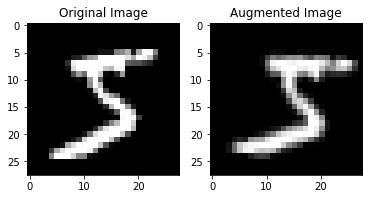

In [10]:
plt.subplot(121)
plt.imshow(np.squeeze(inputs), 'gray')  # np.squeeze : 1인 차원을 제거
plt.title('Original Image')

plt.subplot(122)
plt.title('Augmented Image')
plt.imshow(np.squeeze(image), 'gray')

plt.show()

## ImageDataGenerator 의 변형 옵션
* width_shift_range : 좌우 이동 범위 설정
* height_shift_range : 상하 이동 범위 설정
* brightness_range : 밝기 조절 설정
* zoom_range : 확대 / 축소 범위 설정
* horizontal_flip : 좌우반전 여부(bool)
* vertical_flip : 상하반전 여부(bool)
* **rescale : 픽셀 전처리 단위 설정**
* preprocessing_function : opencv등 외부 라이브러리를 이용한 전처리 할 때 사용

### Rescale 시 주의 사항
train_data_gen에 rescale 옵션을 줬으면 test_data_gen에도 **반드시** rescale이 되어야 한다

In [11]:
train_datagen = ImageDataGenerator(
    zoom_range = 0.7,
    rescale = 1. / 255. # 픽셀 단위를 1/255 로 하겠다.
)

test_datagen = ImageDataGenerator(
    rescale = 1. / 255.
)